In [5]:
import time
from torch.utils.tensorboard import SummaryWriter
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import torchvision.models as models
import torch.nn as nn
import torch

print("GPU : {}".format(torch.cuda.get_device_name()))
normalize=transforms.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5]) 

transform=transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalize
])

dataset_train=ImageFolder('../../Dataset/Dermnet_clear/train',transform=transform)
dataset_valid=ImageFolder('../../Dataset/Dermnet_clear/test',transform=transform) 
numberClass = len(dataset_train.classes)
train_data_size=len(dataset_train)
test_data_size=len(dataset_valid)
print("train length : {}".format(train_data_size))
print("test length : {}".format(test_data_size))


GPU : NVIDIA GeForce RTX 2060
train length : 10126
test length : 2333


In [6]:

dataloader_train=DataLoader(dataset_train,batch_size=64,shuffle=True,num_workers=4,drop_last=True)
dataloader_test=DataLoader(dataset_valid,batch_size=64,shuffle=True,num_workers=4,drop_last=True)

model_ft=models.resnet18(pretrained=True)

in_features=model_ft.fc.in_features
model_ft.fc=nn.Sequential(nn.Linear(in_features,1000),
                          nn.Linear(1000,numberClass))

model_ft=model_ft.cuda()


c:\Users\kjjkjj\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kjjkjj\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
loss_fn = nn.CrossEntropyLoss()

loss_fn = loss_fn.cuda()
optimizer = torch.optim.Adam(model_ft.parameters(), lr=0.00001,)

total_train_step = 0
total_test_step = 0
epoch = 20
writer = SummaryWriter("logs_train_skin")
best_acc = -1
ss_time = time.time()


for i in range(epoch):
    start_time = time.time()
    model_ft.train()
    running_loss = 0.0
    for data in dataloader_train:
        imgs, targets = data
        imgs = imgs.cuda()
        targets = targets.cuda()
        outputs = model_ft(imgs)
        loss = loss_fn(outputs, targets)

        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step()
        running_loss += loss.item()
        total_train_step = total_train_step+1
        if total_train_step % 100 == 0:
            end_time = time.time()

            writer.add_scalar("train_loss", loss.item(), total_train_step)
    print("[{} | train loss : {}]".format(
        total_test_step, running_loss/len(dataloader_train)))
    model_ft.eval()
    total_test_loss = 0
    total_accuracy = 0
    with torch.no_grad():
        for data in dataloader_test:
            imgs, targets = data
            imgs = imgs.cuda()
            targets = targets.cuda()
            outputs = model_ft(imgs)
            loss = loss_fn(outputs, targets)
            total_test_loss = total_test_loss+loss.item()
            accuracy = (outputs.argmax(1) == targets).sum()
            total_accuracy = total_accuracy+accuracy

        writer.add_scalar("test_loss", loss.item(), total_train_step)
        print("[{} | total acc : {}]".format(
            total_test_step, total_accuracy / len(dataset_valid)))
        writer.add_scalar("valid_accuracy",
                          (total_accuracy/len(dataset_valid)), (i+1))
        total_test_step = total_test_step + 1
    torch.save(model_ft, "best_model.pth")
ee_time = time.time()
zong_time = ee_time-ss_time
print("Total Time :{}h:{}m:{}s".format(int(zong_time//3600),
      int((zong_time % 3600)//60), int(zong_time % 60)))
writer.close()


[0 | train loss : 2.2696290385874014]
[0 | total acc : 0.34504929184913635]
[1 | train loss : 1.8965206976178326]
[1 | total acc : 0.40891554951667786]
[2 | train loss : 1.689784798441054]
[2 | total acc : 0.4312044680118561]
[3 | train loss : 1.5384506002257141]
[3 | total acc : 0.45692241191864014]
[4 | train loss : 1.4076851772356638]
[4 | total acc : 0.4830690026283264]
[5 | train loss : 1.2868096979358528]
[5 | total acc : 0.5027860999107361]
[6 | train loss : 1.174068494310862]
[6 | total acc : 0.5186455249786377]
[7 | train loss : 1.0652849621410612]
[7 | total acc : 0.5302186012268066]
[8 | train loss : 0.9579380728021453]
[8 | total acc : 0.5362194776535034]
[9 | train loss : 0.8679676614230192]
[9 | total acc : 0.5512216091156006]
[10 | train loss : 0.7778699665884429]
[10 | total acc : 0.5726532340049744]
[11 | train loss : 0.682205536508862]
[11 | total acc : 0.5786541104316711]
[12 | train loss : 0.5975563509177558]
[12 | total acc : 0.5850836038589478]
[13 | train loss : 

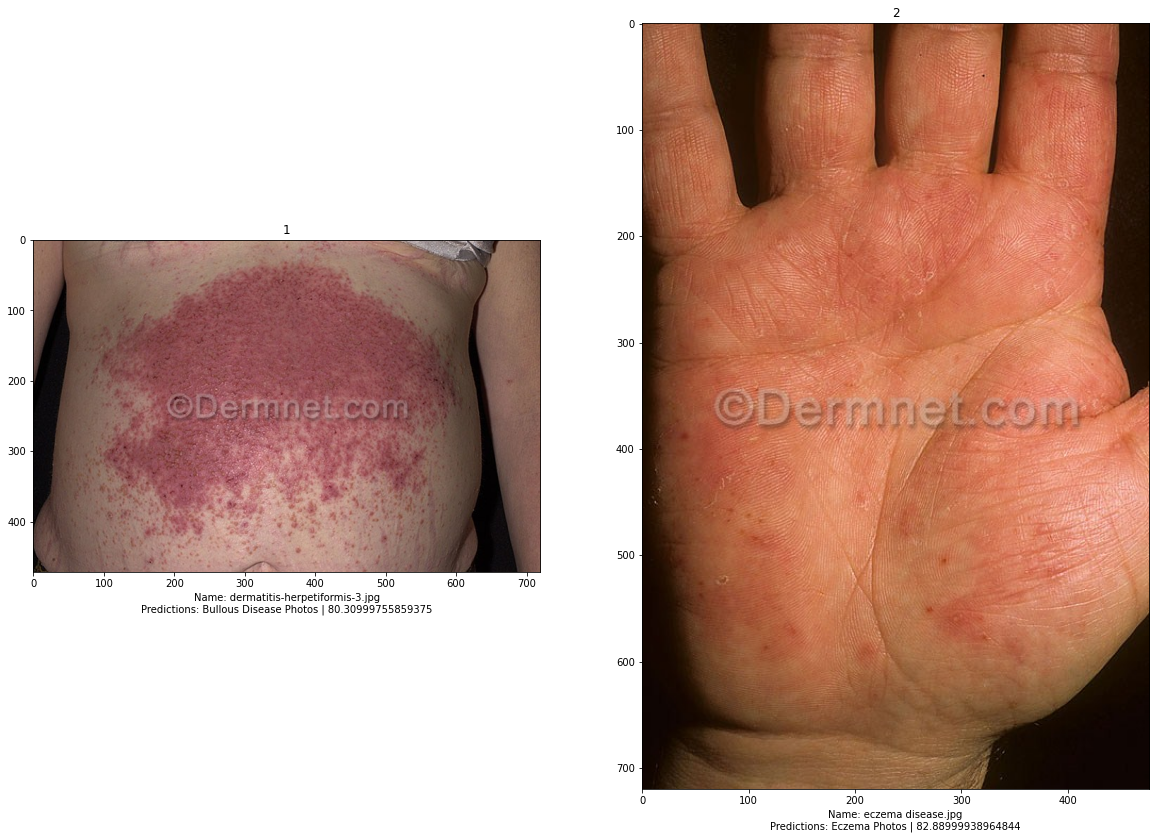

In [9]:
import os
import torch
import torchvision
from PIL import Image
from torch import nn
import matplotlib.pyplot as plt


i = 0 # image count
root_path = "../../Dataset/Dermnet_clear/use_test"
names = os.listdir(root_path)

data_folder = "../../Dataset/Dermnet_clear/train"
data_folderList = os.listdir(data_folder)
data_folderList

image_height = 224
image_width = 224

nrows = int(len(names)/2)
ncols = 2
method = 0
if(int(len(names)/2) < 1):
    method = 0
else:
    method = 1

if(method == 0):
    for name in names:
        i = i+1
        image_path = os.path.join(root_path, name)
        image = Image.open(image_path)

        # if channel is 4
        if(len(image.getbands()) > 3):
            r, g, b, a = image.split()
            new_image = Image.merge('RGB', (r, g, b))
            image = new_image

        transforms = torchvision.transforms.Compose([
            torchvision.transforms.Resize((image_width, image_height)),
            torchvision.transforms.ToTensor()
        ])
        image = transforms(image)
        model = torch.load(
            "best_model.pth", map_location=torch.device("cpu"))
        image = torch.reshape(image, (1, 3, image_width, image_height))
        model.eval()
        with torch.no_grad():
            output = model(image)
        probs = torch.softmax(output, dim=1)
        _, predicted = torch.max(output, dim=1)
        prob = probs[0][predicted.item()]

        _, top3_indices = probs.topk(5)

        total = torch.sum(probs[0])
        percentages = 100 * probs[0] / total
        percentages = torch.round(percentages * 100) / 100
        _, percentages_top3_indices = percentages.topk(5)
        percentages_top3_values = percentages[percentages_top3_indices]
        plt.title(i)
        plt.xlabel(
            f"Name: {name}\nPredictions: {data_folderList[int(probs.argmax(1))]} | {percentages_top3_values[0]}")
        plt.imshow(Image.open(image_path), cmap=plt.cm.jet)

        # print("The{} picture is predicted must to be : {}".format(i,data_folderList[int(probs.argmax(1))]))
        # print("The{} picture is predicted to be : {}, have {}".format(i,data_folderList[top3_indices[0][0]],percentages_top3_values[0]))
        # print("The{} picture is predicted to be : {}, have {}".format(i,data_folderList[top3_indices[0][1]],percentages_top3_values[1]))
        # print("The{} picture is predicted to be : {}, have {}".format(i,data_folderList[top3_indices[0][2]],percentages_top3_values[2]))
        # print("The{} picture is predicted to be : {}, have {}".format(i,data_folderList[top3_indices[0][3]],percentages_top3_values[3]))
        # print("The{} picture is predicted to be : {}, have {}".format(i,data_folderList[top3_indices[0][4]],percentages_top3_values[4]))

if(method == 1):
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 35))
    for c, ax in enumerate(axs.flatten()):
        name = names[i]
        i = i+1
        image_path = os.path.join(root_path, name)
        image = Image.open(image_path)

        # if channel is 4
        if(len(image.getbands()) > 3):
            r, g, b, a = image.split()
            new_image = Image.merge('RGB', (r, g, b))
            image = new_image

        transforms = torchvision.transforms.Compose([
            torchvision.transforms.Resize((image_width, image_height)),
            torchvision.transforms.ToTensor()
        ])
        image = transforms(image)
        model = torch.load(
            "best_model.pth", map_location=torch.device("cpu"))
        image = torch.reshape(image, (1, 3, image_width, image_height))
        model.eval()
        with torch.no_grad():
            output = model(image)
        probs = torch.softmax(output, dim=1)
        _, predicted = torch.max(output, dim=1)
        prob = probs[0][predicted.item()]

        _, top3_indices = probs.topk(5)
        total = torch.sum(probs[0])
        percentages = 100 * probs[0] / total
        percentages = torch.round(percentages * 100) / 100
        _, percentages_top3_indices = percentages.topk(5)
        percentages_top3_values = percentages[percentages_top3_indices]
        plt.sca(ax)
        plt.title(i)
        plt.xlabel(
            f"Name: {name}\nPredictions: {data_folderList[int(probs.argmax(1))]} | {percentages_top3_values[0]}")
        plt.imshow(Image.open(image_path), cmap=plt.cm.jet)

        # print("The{} picture is predicted must to be : {}".format(i,data_folderList[int(probs.argmax(1))]))
        # print("The{} picture is predicted to be : {}, have {}".format(i,data_folderList[top3_indices[0][0]],percentages_top3_values[0]))
        # print("The{} picture is predicted to be : {}, have {}".format(i,data_folderList[top3_indices[0][1]],percentages_top3_values[1]))
        # print("The{} picture is predicted to be : {}, have {}".format(i,data_folderList[top3_indices[0][2]],percentages_top3_values[2]))
        # print("The{} picture is predicted to be : {}, have {}".format(i,data_folderList[top3_indices[0][3]],percentages_top3_values[3]))
        # print("The{} picture is predicted to be : {}, have {}".format(i,data_folderList[top3_indices[0][4]],percentages_top3_values[4]))

plt.show()
